In [1]:
#analysis of telcom churn dataset
url = "https://www.kaggle.com/kashnitsky/topic-1-exploratory-data-analysis-with-pandas/notebook"

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 30) #maximum of columns to show
import warnings
warnings.filterwarnings("ignore")

In [3]:
#loading the dataset
df = pd.read_csv("telecom_churn.csv")

In [4]:
#checking...
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
df.shape

(3333, 21)

In [6]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [7]:
df.drop(labels = "phone number", axis =1, inplace = True)

In [8]:
df.shape

(3333, 20)

In [9]:
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [10]:
df.columns

Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn'],
      dtype='object')

In [11]:
#using info() for details about the datatype of each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64
customer service calls    3333 non-null int64


In [12]:
# QUESTION 1: are there missing values? 
#from the cell above we see there is no missing values

In [13]:
#Do I need to convert some features to numerical type? For exampkle churn could be converted (though not necessarily)

In [14]:
df["churn"] = df["churn"].astype("int64") #converts churn from boolean to binaries

In [15]:
#QUESTION 2: Describe the numerical data (central tendencies and dispersion)

In [16]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [17]:
#for categorical data we describe like this:
df.describe(include = ["object", "bool"])

,state,international plan,voice mail plan
count,3333,3333,3333
unique,51,2,2
top,WV,no,no
freq,106,3010,2411


In [18]:
#la mayoría de la gente no tiene plan de voz ni internacional. Además el estado que más se repite es VIRGINIA

In [19]:
# porentajes de cada caso:
df["churn"].value_counts(normalize = True)# 14,5% de desercion de clientes en el dataset

0    0.855086
1    0.144914
Name: churn, dtype: float64

In [20]:
df["voice mail plan"].value_counts(normalize = True) #72% no tiene buzón de voz

no     0.723372
yes    0.276628
Name: voice mail plan, dtype: float64

In [21]:
df["international plan"].value_counts(normalize = True) #90% no tiene plan internacional

no     0.90309
yes    0.09691
Name: international plan, dtype: float64

In [22]:
#Analisis de los desertores
df["churn"].value_counts(normalize = True)

0    0.855086
1    0.144914
Name: churn, dtype: float64

In [23]:
# 14,5% de desertores, lo cual es bastante

In [24]:
#interrogando a los desertores


In [25]:
df[df["churn"] == 1 ].describe() #boolean indexing

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
count,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.00000,483.000000,483.000000,483.000000,483.0
mean,102.664596,437.817805,5.115942,206.914079,101.335404,35.175921,212.410145,100.561077,18.054969,205.231677,100.399586,9.235528,10.70000,4.163561,2.889545,2.229814,1.0
std,39.467820,42.792270,11.860138,68.997792,21.582307,11.729710,51.728910,19.724711,4.396762,47.132825,19.950659,2.121081,2.79319,2.551575,0.754152,1.853275,0.0
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,70.900000,48.000000,6.030000,47.400000,49.000000,2.130000,2.00000,1.000000,0.540000,0.000000,1.0
25%,76.000000,408.000000,0.000000,153.250000,87.500000,26.055000,177.100000,87.000000,15.055000,171.250000,85.000000,7.705000,8.80000,2.000000,2.380000,1.000000,1.0
50%,103.000000,415.000000,0.000000,217.600000,103.000000,36.990000,211.300000,101.000000,17.960000,204.800000,100.000000,9.220000,10.60000,4.000000,2.860000,2.000000,1.0
75%,127.000000,510.000000,0.000000,265.950000,116.500000,45.210000,249.450000,114.000000,21.205000,239.850000,115.000000,10.795000,12.80000,5.000000,3.460000,4.000000,1.0
max,225.000000,510.000000,48.000000,350.800000,165.000000,59.640000,363.700000,168.000000,30.910000,354.900000,158.000000,15.970000,20.00000,20.000000,5.400000,9.000000,1.0


In [26]:
df[df["churn"] == 1].max() #formas de interrogar de a uno

state                        WY
account length              225
area code                   510
international plan          yes
voice mail plan             yes
number vmail messages        48
total day minutes         350.8
total day calls             165
total day charge          59.64
total eve minutes         363.7
total eve calls             168
total eve charge          30.91
total night minutes       354.9
total night calls           158
total night charge        15.97
total intl minutes           20
total intl calls             20
total intl charge           5.4
customer service calls        9
churn                         1
dtype: object

In [27]:
df[(df["churn"] == 0) & (df["international plan"] == "no")]["total intl minutes"].max() #pregunta: cual es la maxima duracion
#de llamado en clientes leales sin plan internacional?

18.9

In [28]:
df.head(2)

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,0
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,0


In [29]:
#usando loc para crear subtablas
df.loc[0:5, "state":"total day charge"]

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge
0,KS,128,415,no,yes,25,265.1,110,45.07
1,OH,107,415,no,yes,26,161.6,123,27.47
2,NJ,137,415,no,no,0,243.4,114,41.38
3,OH,84,408,yes,no,0,299.4,71,50.90
4,OK,75,415,yes,no,0,166.7,113,28.34
5,AL,118,510,yes,no,0,223.4,98,37.98


In [30]:
df.loc[0:5, ["state", "total day charge"]]

,state,total day charge
0,KS,45.07
1,OH,27.47
2,NJ,41.38
3,OH,50.90
4,OK,28.34
5,AL,37.98


In [31]:
#aplicar funciones a elementos del dataframe: apply
#ejemplos
#df["total day calls"].apply(np.max)
def ff(item):
    return item **2
df.loc[0:3, "total day calls"].apply(ff)

0    12100
1    15129
2    12996
3     5041
Name: total day calls, dtype: int64

In [32]:
#utilizar funcion lambda para busqueda de totos los estados que empiecen con W
df[df["state"].apply(lambda state: state[0] == "W")].head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
9,WV,141,415,yes,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0
26,WY,57,408,no,yes,39,213.0,115,36.21,191.1,112,16.24,182.7,115,8.22,9.5,3,2.57,0,0
44,WI,64,510,no,no,0,154.0,67,26.18,225.8,118,19.19,265.3,86,11.94,3.5,3,0.95,1,0
49,WY,97,415,no,yes,24,133.2,135,22.64,217.2,58,18.46,70.6,79,3.18,11.0,3,2.97,1,0
54,WY,87,415,no,no,0,151.0,83,25.67,219.7,116,18.67,203.9,127,9.18,9.7,3,2.62,5,1


In [33]:
#map permite reemplazar datos de una columna de acuerdo a lo que le instruya por ejemplo con u diccionario
#d = {"yes": "Yipee", "no": "Nopi"}
#reemplazo en international plan
#df["international plan"] = df["international plan"].map(d)

In [34]:
#Grouping
#formula: df.groupby(by=grouping_columns)[columns_to_show].function()

In [35]:
#ejemplo: agrupar por churn (si/no) mostrando los minutos de noche, tarde y día y descibir

In [36]:
columns_to_show = ["total day minutes", "total eve minutes", "total night minutes"]
df.groupby(["churn"])[columns_to_show].describe()

total day minutes                                                      \
                  count        mean        std  min      25%    50%     75%   
churn                                                                         
0                2850.0  175.175754  50.181655  0.0  142.825  177.2  210.30   
1                 483.0  206.914079  68.997792  0.0  153.250  217.6  265.95   

             total eve minutes                                             \
         max             count        mean        std   min    25%    50%   
churn                                                                       
0      315.6            2850.0  199.043298  50.292175   0.0  164.5  199.6   
1      350.8             483.0  212.410145  51.728910  70.9  177.1  211.3   

                     total night minutes                                       \
          75%    max               count        mean        std   min     25%   
churn                                                                           
0      233.20  361.8              2850.0  200.133193  51.105032  23.2  165.90   
1      249.45  363.7               483.0  205.231677  47.132825  47.4  171.25   

                              
          50%     75%    max  
churn                         
0      200.25  234.90  395.0  
1      204.80  239.85  354.9

In [37]:
#en promedio los desertores hablan más

In [38]:
#idem pero usando agg
df.groupby(["churn"])[columns_to_show].agg([np.mean, np.std])

total day minutes            total eve minutes             \
                   mean        std              mean        std   
churn                                                             
0            175.175754  50.181655        199.043298  50.292175   
1            206.914079  68.997792        212.410145  51.728910   

      total night minutes             
                     mean        std  
churn                                 
0              200.133193  51.105032  
1              205.231677  47.132825

In [39]:
#usando crosstab
pd.crosstab(df["churn"], df["international plan"], normalize = True)

international plan,no,yes
churn,,
0,0.79928,0.055806
1,0.10381,0.041104


In [40]:
pd.crosstab(df["state"], df["voice mail plan"])

voice mail plan,no,yes
state,,
AK,36,16
AL,59,21
AR,41,14
AZ,45,19
CA,23,11
CO,47,19
CT,53,21
DC,36,18
DE,46,15


In [ ]:
#pivot tables
#structure: df.pivot_table( values, index, aggfunc )

In [43]:
df.pivot_table(["total day calls", "total eve calls", "total night calls"], ["area code"], aggfunc = "mean")

,total day calls,total eve calls,total night calls
area code,,,
408,100.496420,99.788783,99.039379
415,100.576435,100.503927,100.398187
510,100.097619,99.671429,100.601190


In [44]:
#mas...
df.columns

Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn'],
      dtype='object')

In [46]:
df.pivot_table(["total intl minutes", "customer service calls"], ["state"], aggfunc = ["mean", "std"]).head(3)

mean                                       std  \
      customer service calls total intl minutes customer service calls   
state                                                                    
AK                  1.557692          10.019231               1.243232   
AL                  1.562500          10.292500               1.403826   
AR                  1.981818          10.372727               1.627210   

                          
      total intl minutes  
state                     
AK              2.624324  
AL              2.763358  
AR              2.769641

In [47]:
#otro
df.pivot_table(["total intl minutes", "customer service calls"], ["churn"], aggfunc ="sum")

,customer service calls,total intl minutes
churn,,
0,4132,28952.8
1,1077,5168.1


In [48]:
#dataframe transformations
#adding columns to a dataframe
#first we create a new Series and the we add it to de dataframe
#hagamios una columna Series con el total de llamadas
total_calls = df["total day calls"] + df["total eve calls"] + df["total night calls"]

In [49]:
total_calls.head(3)

0    300
1    329
2    328
dtype: int64

In [50]:
total_calls

0       300
1       329
2       328
3       248
4       356
5       317
6       314
7       269
8       267
9       292
10      331
11      369
12      295
13      278
14      245
15      292
16      304
17      346
18      239
19      252
20      343
21      274
22      289
23      310
24      273
25      303
26      342
27      241
28      295
29      316
       ... 
3303    307
3304    334
3305    298
3306    335
3307    297
3308    256
3309    309
3310    306
3311    301
3312    333
3313    320
3314    275
3315    310
3316    315
3317    297
3318    355
3319    326
3320    311
3321    362
3322    299
3323    279
3324    301
3325    296
3326    307
3327    294
3328    286
3329    235
3330    258
3331    326
3332    272
Length: 3333, dtype: int64

In [ ]:
#insertar ahora en df
#usamos insert
#structure df.insert(loc=lubicacion en la tabla, column= nombre que le quiero dar, value= Series a pegar) 
# loc = len(df.columns) para que quede al finalito

In [51]:
#df.insert(loc = len(df.columns),column = "total calls", value = total_calls)

In [52]:
df.columns

Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn', 'total calls'],
      dtype='object')

In [53]:
#yes

In [54]:
df.head(2)

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total calls
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,0,300
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,0,329


In [56]:
#pero mas rapido:
#creo una columna y le doy altiro el valor:
df["total callys"] = df["total day calls"] + df["total eve calls"] + df["total night calls"]

In [57]:
df.columns

Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn', 'total calls', 'total callys'],
      dtype='object')

In [59]:
#borrar una columna
df.drop(["total callys"], axis = 1, inplace = True)


In [61]:
df.columns

Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn', 'total calls'],
      dtype='object')

In [62]:
df.drop(["total calls"], axis = 1, inplace = True)

In [63]:
df.columns

Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn'],
      dtype='object')

In [64]:
#yep

In [67]:
#First attempt to predict the churn

In [71]:
#how churn is related to international plan
pd.crosstab(df["churn"], df["international plan"], margins = True)


international plan,no,yes,All
churn,,,
0,2664,186,2850
1,346,137,483
All,3010,323,3333


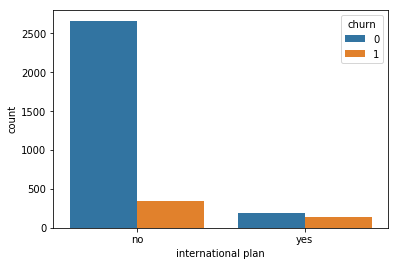

In [72]:
sns.countplot(x = "international plan", hue = "churn", data = df)

In [76]:
#lo mismo con customer service calls
pd.crosstab(df["churn"], df["customer service calls"], margins = True)

customer service calls,0,1,2,3,4,5,6,7,8,9,All
churn,,,,,,,,,,,
0,605,1059,672,385,90,26,8,4,1,0,2850
1,92,122,87,44,76,40,14,5,1,2,483
All,697,1181,759,429,166,66,22,9,2,2,3333


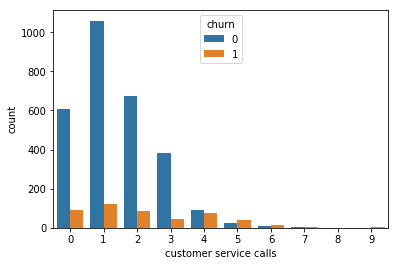

In [77]:
sns.countplot(x= "customer service calls", hue = "churn", data = df)

In [78]:
df.head(2)

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,0
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,0


In [80]:
pd.crosstab(df["churn"], df["international plan"], margins = True)

international plan,no,yes,All
churn,,,
0,2664,186,2850
1,346,137,483
All,3010,323,3333


In [81]:
#vemos que la tasa de churn entre los  e si tienen plan es mayor (42%)
#veamos el customer srrvice calls
pd.crosstab(df["churn"], df["customer service calls"], margins = True)

customer service calls,0,1,2,3,4,5,6,7,8,9,All
churn,,,,,,,,,,,
0,605,1059,672,385,90,26,8,4,1,0,2850
1,92,122,87,44,76,40,14,5,1,2,483
All,697,1181,759,429,166,66,22,9,2,2,3333


In [94]:
# a medida que aumentan los llamados la tasa churn/total aumenta
#seleccionesmo un crosstab para calls >3
df["many_calls"] = (df["customer service calls"] > 3).astype(int)
pd.crosstab(df["many_calls"], df["churn"], margins = True)

churn,0,1,All
many_calls,,,
0,2721,345,3066
1,129,138,267
All,2850,483,3333


In [86]:
#sobre 4 es grande la desercion

In [ ]:
#uniendo: los que tienen international plan y llaman mas de 3 veces a service

In [95]:
pd.crosstab(df["many_calls"]&df["international plan"], df["churn"])

churn,0,1
row_0,,
False,2721,345
True,129,138
